In [172]:
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
SystemLoad = pd.ExcelFile('System Load Analysis.xlsx')
SystemLoad.sheet_names  # see all sheet names

['Instructions', 'Electric Demand', 'Weather']

In [174]:
Electric_Demand= SystemLoad.parse('Electric Demand', index_col='Eastern Date Hour')
Electric_Demand.head()

,MW
Eastern Date Hour,
2016-01-01 00:00:00,893.7
2016-01-01 01:00:00,862.3
2016-01-01 02:00:00,794.3
2016-01-01 03:00:00,804.0
2016-01-01 04:00:00,812.0


In [175]:
Electric_Demand.dtypes

MW    float64
dtype: object

In [176]:
Electric_Demand.loc['2016'].count()

MW    8784
dtype: int64

In [177]:
Electric_Demand.loc['2017'].count()

MW    8760
dtype: int64

In [178]:
Electric_Demand.isna().sum()

MW    0
dtype: int64

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 6)})

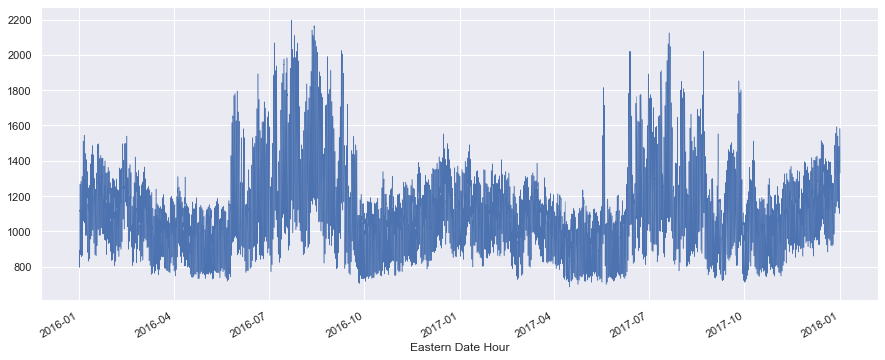

In [180]:
Electric_Demand['MW'].plot(linewidth=0.5);

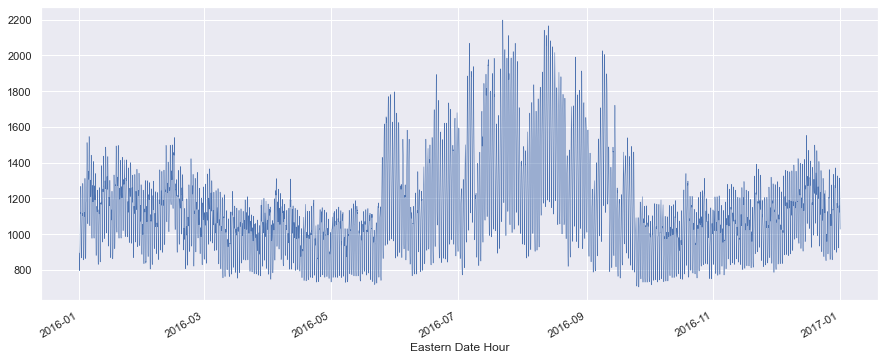

In [181]:
Electric_Demand.loc['2016']['MW'].plot(linewidth=0.5);

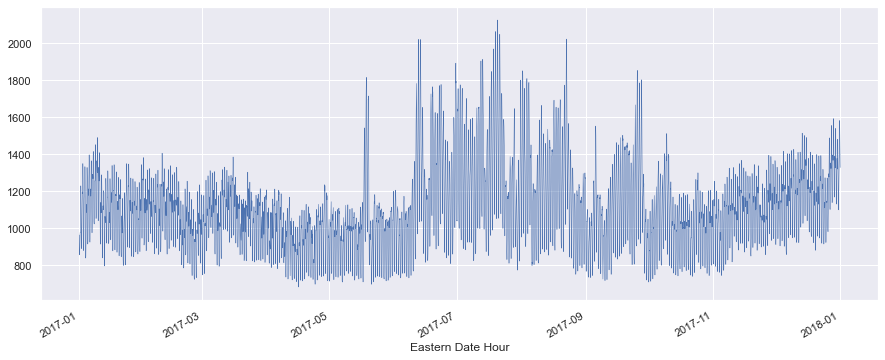

In [182]:
Electric_Demand.loc['2017']['MW'].plot(linewidth=0.5);

In [183]:
Electric_Demand['Year'] = Electric_Demand.index.year
Electric_Demand['Month'] = Electric_Demand.index.month
Electric_Demand['Day'] = Electric_Demand.index.day
Electric_Demand['Hour'] = Electric_Demand.index.hour
Electric_Demand['Weekday Name'] = Electric_Demand.index.weekday
#Season
years = [i for i in range(2015, 2018)]
for y in years:
    Electric_Demand.loc[str(y)+'-03-20 05:00:00': str(y)+'-06-21 05:00:00', 'Season'] = 1 #'Spring'
    Electric_Demand.loc[str(y)+'-06-21 06:00:00': str(y)+'-09-22 05:00:00', 'Season'] = 2 #'Summer'
    Electric_Demand.loc[str(y)+'-09-22 06:00:00': str(y)+'-12-21 05:00:00', 'Season'] = 3 #'Autumn'
    Electric_Demand.loc[str(y)+'-12-21 06:00:00': str(y+1)+'-03-20 04:00:00', 'Season'] = 4 #'Winter'


In [184]:
Electric_Demand.isna().sum()

MW              0
Year            0
Month           0
Day             0
Hour            0
Weekday Name    0
Season          0
dtype: int64

In [185]:
Peaks = Electric_Demand[Electric_Demand['MW'] > 2000].copy()

In [186]:
Peaks

,MW,Year,Month,Day,Hour,Weekday Name,Season
Eastern Date Hour,,,,,,,
2016-07-06 15:00:00,2027.2,2016,7,6,15,2,2.0
2016-07-06 16:00:00,2053.8,2016,7,6,16,2,2.0
2016-07-06 17:00:00,2068.3,2016,7,6,17,2,2.0
2016-07-06 18:00:00,2049.1,2016,7,6,18,2,2.0
2016-07-22 13:00:00,2031.6,2016,7,22,13,4,2.0
...,...,...,...,...,...,...,...
2017-07-20 17:00:00,2048.7,2017,7,20,17,3,2.0
2017-07-21 16:00:00,2044.7,2017,7,21,16,4,2.0
2017-07-21 17:00:00,2048.2,2017,7,21,17,4,2.0


In [187]:
sns.set(rc={'figure.figsize':(8, 6)})

Text(0, 0.5, 'N of Peaks')

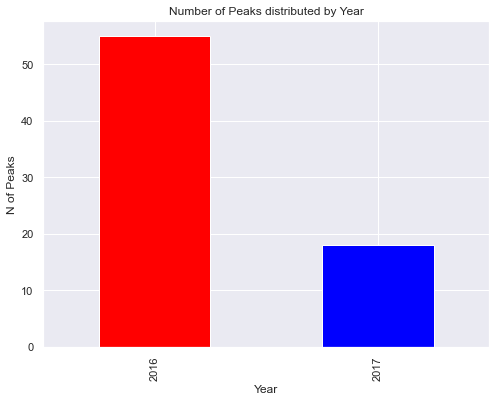

In [188]:
Peaks.Year.value_counts().plot(kind = 'bar', color=['red', 'blue'])
plt.title('Number of Peaks distributed by Year')
plt.xlabel('Year')
plt.ylabel('N of Peaks')

Text(0, 0.5, 'N of Peaks')

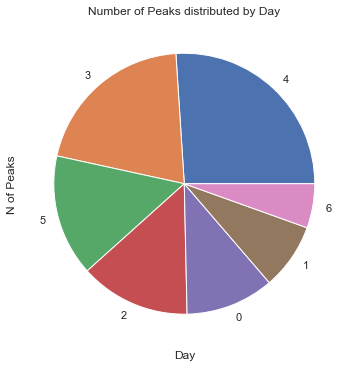

In [189]:
Peaks['Weekday Name'].value_counts().plot(kind = 'pie')
plt.title('Number of Peaks distributed by Day')
plt.xlabel('Day')
plt.ylabel('N of Peaks')
#plt.legend(['Monday is 0 and Sunday is 6'])


Text(0.5, 1.0, 'Number of Peaks distributed by Month')

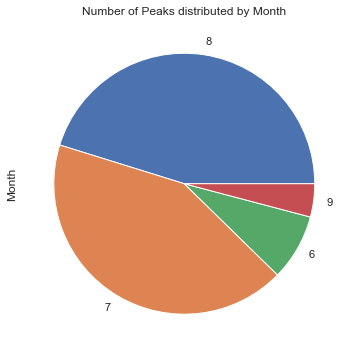

In [190]:
Peaks['Month'].value_counts().plot(kind = 'pie')
plt.title('Number of Peaks distributed by Month')

Text(0, 0.5, 'N of Peaks')

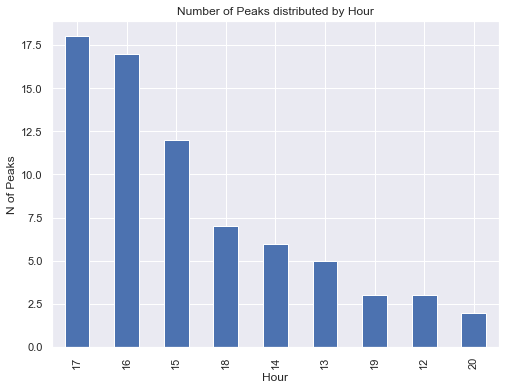

In [191]:
Peaks['Hour'].value_counts().plot(kind = 'bar')
plt.title('Number of Peaks distributed by Hour')
plt.xlabel('Hour')
plt.ylabel('N of Peaks')

Text(0, 0.5, 'N of Peaks')

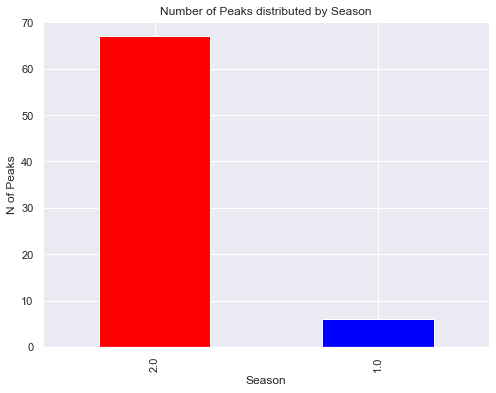

In [192]:
Peaks['Season'].value_counts().plot(kind = 'bar', color=['red', 'blue'])
plt.title('Number of Peaks distributed by Season')
plt.xlabel('Season')
plt.ylabel('N of Peaks')

In [193]:
Weather= SystemLoad.parse('Weather', index_col='datetime')
Weather

,tempf,dewpoint,winddir,windspeed,skycond
datetime,,,,,
2003-01-01 01:00:00,42.799999,37.400002,230.0,36.0,2700.0
2003-01-01 02:00:00,42.799999,37.400002,240.0,46.0,2700.0
2003-01-01 03:00:00,41.000000,35.599998,260.0,41.0,2700.0
2003-01-01 04:00:00,39.200001,35.599998,NaN,0.0,3000.0
2003-01-01 05:00:00,37.400002,35.599998,NaN,0.0,2400.0
...,...,...,...,...,...
2017-12-31 16:00:00,12.020000,-7.960000,310.0,46.0,22000.0
2017-12-31 17:00:00,10.940000,-7.960000,320.0,41.0,22000.0
2017-12-31 18:00:00,10.040000,-9.040000,300.0,36.0,22000.0


In [194]:
Weather.isna().sum()

tempf          358
dewpoint       938
winddir      54692
windspeed     1000
skycond        284
dtype: int64

<AxesSubplot:xlabel='tempf'>

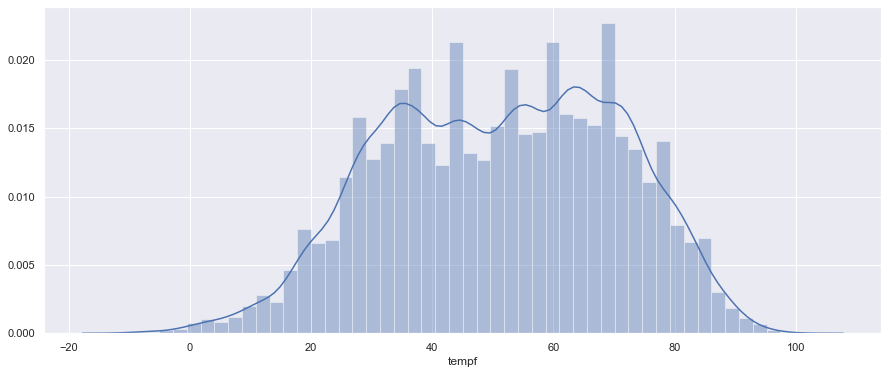

In [195]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.distplot(Weather['tempf'][~Weather['tempf'].isna()])# Remove the NaNs

In [196]:
Weather.groupby(Weather.index.year).count()

,tempf,dewpoint,winddir,windspeed,skycond
datetime,,,,,
2003,8660,8462,4916,8560,8603
2004,8749,8610,5422,8643,8784
2005,8753,8644,5215,8631,8759
2006,8760,8746,5369,8743,8753
2007,8760,8755,5055,8751,8757
2008,8764,8750,4884,8716,8761
2009,8760,8747,4996,8697,8756
2010,8673,8660,5063,8638,8711
2011,8728,8720,4848,8725,8741


In [197]:
#if windspeed = 0 then wind dir should be 0 too
Weather.loc[Weather['windspeed'] == 0, 'winddir'] = 0
Weather.loc['2003-02-17']

,tempf,dewpoint,winddir,windspeed,skycond
datetime,,,,,
2003-02-17 00:00:00,6.8,-11.2,10.000000,31.000000,2100.0
2003-02-17 01:00:00,6.8,-11.2,40.000000,36.000000,1320.0
2003-02-17 02:00:00,6.8,-9.4,30.000000,46.000000,900.0
2003-02-17 03:00:00,6.8,-5.8,30.000000,31.000000,420.0
2003-02-17 04:00:00,6.8,-2.2,30.000000,36.000000,360.0
2003-02-17 05:00:00,5.0,-0.4,20.000000,51.000000,330.0
2003-02-17 06:00:00,5.0,1.4,20.000000,31.000000,180.0
2003-02-17 07:00:00,NaN,NaN,10.000000,41.000000,99999.0
2003-02-17 08:00:00,6.8,1.4,20.000000,62.000000,210.0


In [198]:
Weather.isna().sum()

tempf         358
dewpoint      938
winddir      6772
windspeed    1000
skycond       284
dtype: int64

In [199]:
Weather = Weather.interpolate()
Weather.isna().sum()

tempf        0
dewpoint     0
winddir      0
windspeed    0
skycond      0
dtype: int64

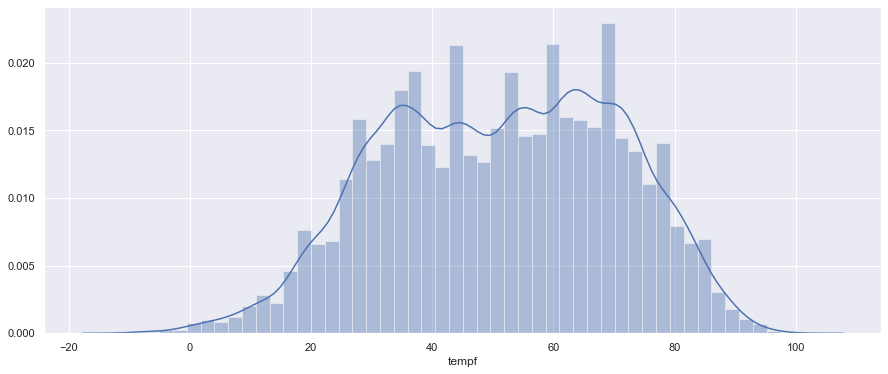

In [200]:
sns.distplot(Weather.tempf);

In [201]:
Weather.loc['2003-02-17']

,tempf,dewpoint,winddir,windspeed,skycond
datetime,,,,,
2003-02-17 00:00:00,6.8,-11.20,10.000000,31.000000,2100.0
2003-02-17 01:00:00,6.8,-11.20,40.000000,36.000000,1320.0
2003-02-17 02:00:00,6.8,-9.40,30.000000,46.000000,900.0
2003-02-17 03:00:00,6.8,-5.80,30.000000,31.000000,420.0
2003-02-17 04:00:00,6.8,-2.20,30.000000,36.000000,360.0
2003-02-17 05:00:00,5.0,-0.40,20.000000,51.000000,330.0
2003-02-17 06:00:00,5.0,1.40,20.000000,31.000000,180.0
2003-02-17 07:00:00,5.9,1.40,10.000000,41.000000,99999.0
2003-02-17 08:00:00,6.8,1.40,20.000000,62.000000,210.0


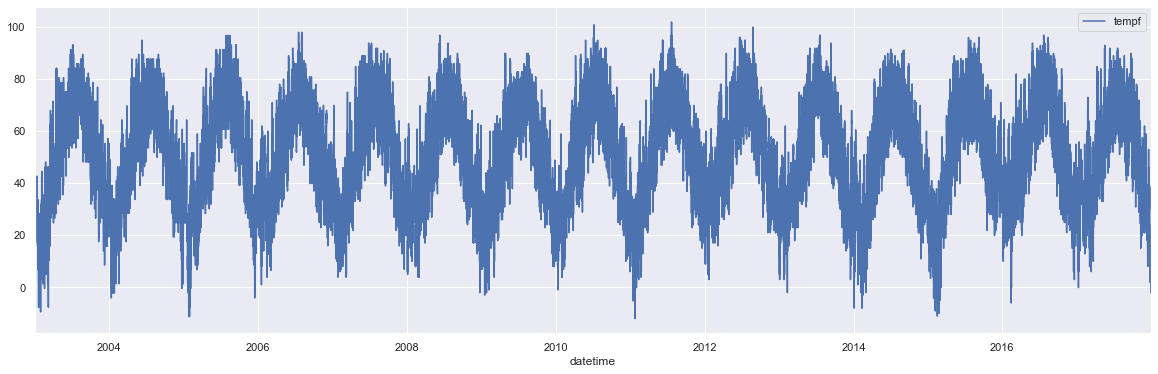

In [202]:
_ = Weather[['tempf']].plot(figsize=(20, 6))

In [203]:
temp_Peaks= Weather.nlargest(60, ['tempf']) 
temp_Peaks

,tempf,dewpoint,winddir,windspeed,skycond
datetime,,,,,
2011-07-22 15:00:00,102.019997,66.919998,260.0,41.0,22000.000000
2010-07-06 14:00:00,100.940002,66.019997,340.0,36.0,22000.000000
2011-07-22 16:00:00,100.940002,64.040001,270.0,36.0,22000.000000
2010-07-06 15:00:00,100.040001,66.019997,350.0,21.0,22000.000000
2011-07-22 14:00:00,100.040001,69.980003,220.0,41.0,22000.000000
2011-07-22 17:00:00,100.040001,62.959999,280.0,41.0,22000.000000
2012-08-25 11:00:00,100.040001,64.940002,110.0,15.0,22000.000000
2012-08-25 12:00:00,100.040001,62.060001,0.0,0.0,22000.000000
2012-08-25 13:00:00,100.040001,62.959999,50.0,31.0,22000.000000


In [204]:
#Weather['Month'].groupby(Weather.index.year).count()
temps= Weather.groupby([Weather.index.year, Weather.index.month])['tempf'].mean().unstack()#.plot(kind = 'box')

#Weather['Month'].value_counts().plot(kind = 'bar')

In [205]:
temps.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
temps= temps.reset_index()
temps= temps.drop(columns=['datetime'])
temps['mean'] = temps.mean(axis=1)
temps

,1,2,3,4,5,6,7,8,9,10,11,12,mean
0,21.135639,24.317634,36.837117,46.213958,56.711492,66.224396,72.561855,73.098125,63.780791,49.846452,43.769583,32.164919,48.888497
1,19.936492,29.187716,40.674315,51.130125,63.157719,67.795940,72.170426,70.909937,64.591792,51.654625,42.589250,31.914764,50.476092
2,24.447460,30.193259,33.692621,51.871417,55.818911,72.288583,75.050202,74.935444,67.967583,53.153992,45.164738,28.347460,51.077639
3,33.909146,30.715326,38.245398,50.536321,58.867339,67.961385,75.213328,71.160336,61.046658,50.782794,46.040642,38.594065,51.922728
4,32.187154,23.207663,35.177774,46.034479,61.432141,68.455979,71.229540,71.018522,64.515125,58.020126,40.002019,30.774038,50.171213
5,30.099830,29.074496,37.387626,51.598504,56.071107,70.035319,73.949150,67.816747,64.025463,48.772252,41.255921,31.911457,50.166489
6,21.264279,30.044237,38.243682,51.345529,59.283311,65.578016,68.654518,71.658871,61.170845,50.264573,45.070502,29.744002,49.360197
7,26.307465,29.478669,43.526190,53.439383,62.252196,70.395104,76.179760,71.976576,65.565274,53.091084,41.544158,28.876697,51.886046
8,22.993329,28.751901,38.214728,51.111429,62.718425,69.138601,75.781248,71.287741,66.425061,52.946775,45.623613,37.276726,51.855798
9,32.304519,36.091751,47.940407,51.111475,64.284202,68.303493,75.396758,72.819195,64.033334,55.108646,38.818296,36.170107,53.531849


In [206]:
Weather.loc[(Weather.index > '2016-01-01') & (Weather.index <= '2018-01-01')]

,tempf,dewpoint,winddir,windspeed,skycond
datetime,,,,,
2016-01-01 01:00:00,39.919998,26.959999,280.0,31.0,50609.0
2016-01-01 02:00:00,39.020000,28.040001,280.0,21.0,1189.0
2016-01-01 03:00:00,39.919998,26.959999,250.0,26.0,1128.0
2016-01-01 04:00:00,39.919998,26.959999,250.0,41.0,1219.0
2016-01-01 05:00:00,39.919998,28.040001,240.0,41.0,1097.0
...,...,...,...,...,...
2017-12-31 16:00:00,12.020000,-7.960000,310.0,46.0,22000.0
2017-12-31 17:00:00,10.940000,-7.960000,320.0,41.0,22000.0
2017-12-31 18:00:00,10.040000,-9.040000,300.0,36.0,22000.0


Start Forecasting

In [207]:
result = Electric_Demand.join(Weather)


In [208]:
result = result.drop(columns=['Year', 'Day','Month'])
result

,MW,Hour,Weekday Name,Season,tempf,dewpoint,winddir,windspeed,skycond
2016-01-01 00:00:00,893.7,0,4,4.0,41.000000,26.959999,280.0,26.0,1219.0
2016-01-01 01:00:00,862.3,1,4,4.0,39.919998,26.959999,280.0,31.0,50609.0
2016-01-01 02:00:00,794.3,2,4,4.0,39.020000,28.040001,280.0,21.0,1189.0
2016-01-01 03:00:00,804.0,3,4,4.0,39.919998,26.959999,250.0,26.0,1128.0
2016-01-01 04:00:00,812.0,4,4,4.0,39.919998,26.959999,250.0,41.0,1219.0
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,1523.3,19,6,4.0,8.060000,-9.040000,310.0,31.0,22000.0
2017-12-31 20:00:00,1480.0,20,6,4.0,6.980000,-9.040000,290.0,36.0,22000.0
2017-12-31 21:00:00,1431.0,21,6,4.0,NaN,NaN,NaN,NaN,NaN
2017-12-31 22:00:00,1380.5,22,6,4.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

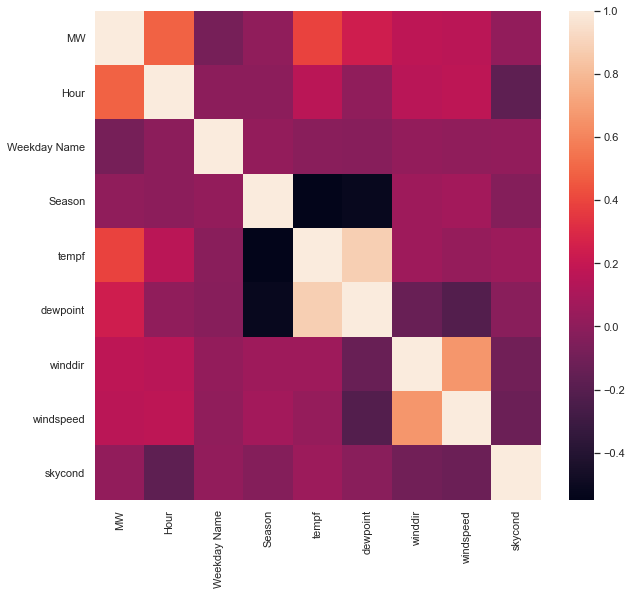

In [209]:
import seaborn as sns   
plt.figure(figsize=(10, 9))
sns.heatmap(result.corr())

In [210]:
result.columns

Index(['MW', 'Hour', 'Weekday Name', 'Season', 'tempf', 'dewpoint', 'winddir',
       'windspeed', 'skycond'],
      dtype='object')

In [211]:
df_norm = result.copy()

load_min, load_max = df_norm['MW'].min(), df_norm['MW'].max()
hour_min, hour_max = df_norm['Hour'].min(), df_norm['Hour'].max()
ssn_min, ssn_max = df_norm['Season'].min(), df_norm['Season'].max()
temp_min, temp_max = df_norm['tempf'].min(), df_norm['tempf'].max()
dew_min, dew_max = df_norm['dewpoint'].min(), df_norm['dewpoint'].max()
winddir_min, winddir_max = df_norm['winddir'].min(), df_norm['winddir'].max()
windspeed_min, windspeed_max = df_norm['windspeed'].min(), df_norm['windspeed'].max()
skycond_min, skycond_max = df_norm['skycond'].min(), df_norm['skycond'].max()
weekday_min, weekday_max = df_norm['Weekday Name'].min(), df_norm['Weekday Name'].max()



df_norm['MW'] = (result['MW'] - load_min) / (load_max - load_min)
df_norm['Hour'] = (result['Hour'] - hour_min) / (hour_max - hour_min)
df_norm['Season'] = (result['Season'] - ssn_min) / (ssn_max - ssn_min)
df_norm['tempf'] = (result['tempf'] - temp_min) / (temp_max - temp_min)
df_norm['dewpoint'] = (result['dewpoint'] - dew_min) / (dew_max - dew_min)
df_norm['winddir'] = (result['winddir'] - winddir_min) / (winddir_max - winddir_min)
df_norm['windspeed'] = (result['windspeed'] - windspeed_min) / (windspeed_max - windspeed_min)
df_norm['skycond'] = (result['skycond'] - skycond_min) / (skycond_max - skycond_min)
df_norm['Weekday Name'] = (result['Weekday Name'] - weekday_min) / (weekday_max - weekday_min)


df_norm.head()

,MW,Hour,Weekday Name,Season,tempf,dewpoint,winddir,windspeed,skycond
2016-01-01 00:00:00,0.138735,0.000000,0.666667,1.0,0.456294,0.494662,0.777778,0.187050,0.011894
2016-01-01 01:00:00,0.118001,0.043478,0.666667,1.0,0.445804,0.494662,0.777778,0.223022,0.505947
2016-01-01 02:00:00,0.073098,0.086957,0.666667,1.0,0.437063,0.505338,0.777778,0.151079,0.011594
2016-01-01 03:00:00,0.079503,0.130435,0.666667,1.0,0.445804,0.494662,0.694444,0.187050,0.010983
2016-01-01 04:00:00,0.084786,0.173913,0.666667,1.0,0.445804,0.494662,0.694444,0.294964,0.011894


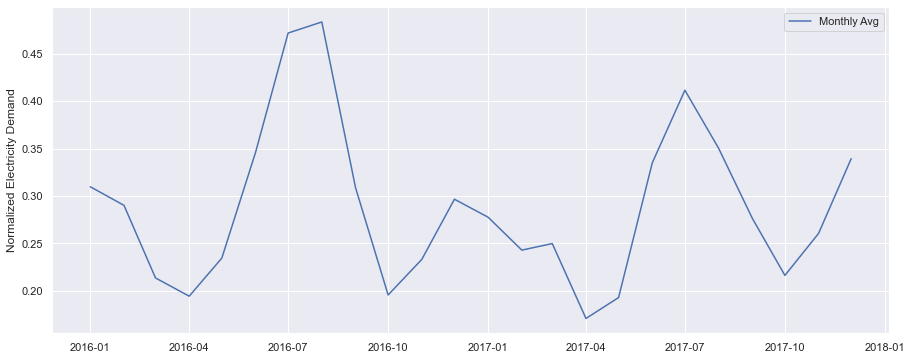

In [212]:
monthly_norm = df_norm['MW'].resample('MS').mean().bfill()
#plt.plot(df_norm['MW'], label='Hourly')
plt.plot(monthly_norm, label='Monthly Avg')
plt.ylabel('Normalized Electricity Demand')
plt.legend();

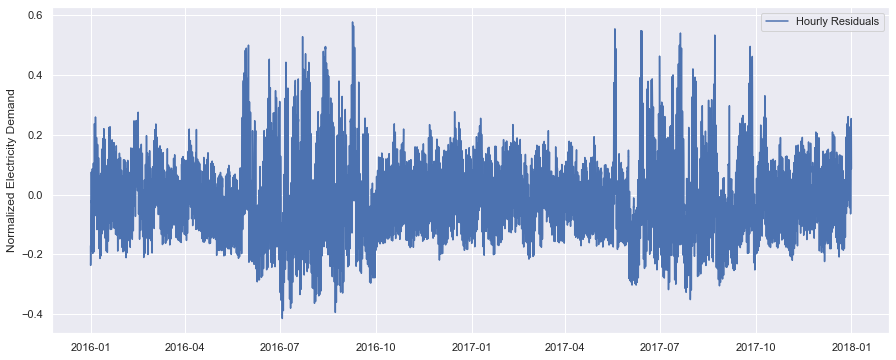

In [213]:
hourly_res_norm = df_norm.copy()
hourly_res_norm['MW'] = df_norm['MW'].groupby(pd.Grouper(freq='M')).transform(lambda x: x - x.mean())
plt.plot(hourly_res_norm['MW'], label='Hourly Residuals')
plt.ylabel('Normalized Electricity Demand')
plt.legend();

In [214]:
hourly_res_norm

,MW,Hour,Weekday Name,Season,tempf,dewpoint,winddir,windspeed,skycond
2016-01-01 00:00:00,-0.170975,0.000000,0.666667,1.0,0.456294,0.494662,0.777778,0.187050,0.011894
2016-01-01 01:00:00,-0.191709,0.043478,0.666667,1.0,0.445804,0.494662,0.777778,0.223022,0.505947
2016-01-01 02:00:00,-0.236611,0.086957,0.666667,1.0,0.437063,0.505338,0.777778,0.151079,0.011594
2016-01-01 03:00:00,-0.230206,0.130435,0.666667,1.0,0.445804,0.494662,0.694444,0.187050,0.010983
2016-01-01 04:00:00,-0.224923,0.173913,0.666667,1.0,0.445804,0.494662,0.694444,0.294964,0.011894
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,0.215159,0.826087,1.000000,1.0,0.136364,0.138790,0.861111,0.223022,0.219768
2017-12-31 20:00:00,0.186567,0.869565,1.000000,1.0,0.125874,0.138790,0.805556,0.258993,0.219768
2017-12-31 21:00:00,0.154211,0.913043,1.000000,1.0,NaN,NaN,NaN,NaN,NaN
2017-12-31 22:00:00,0.120864,0.956522,1.000000,1.0,NaN,NaN,NaN,NaN,NaN


In [215]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [216]:
X= hourly_res_norm.copy()
y= X.pop('MW')

In [217]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.4993)

In [218]:
X_train

,Hour,Weekday Name,Season,tempf,dewpoint,winddir,windspeed,skycond
2016-01-01 00:00:00,0.000000,0.666667,1.0,0.456294,0.494662,0.777778,0.187050,0.011894
2016-01-01 01:00:00,0.043478,0.666667,1.0,0.445804,0.494662,0.777778,0.223022,0.505947
2016-01-01 02:00:00,0.086957,0.666667,1.0,0.437063,0.505338,0.777778,0.151079,0.011594
2016-01-01 03:00:00,0.130435,0.666667,1.0,0.445804,0.494662,0.694444,0.187050,0.010983
2016-01-01 04:00:00,0.173913,0.666667,1.0,0.445804,0.494662,0.694444,0.294964,0.011894
...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,0.826087,0.833333,1.0,0.437063,0.396797,0.555556,0.223022,0.219768
2016-12-31 20:00:00,0.869565,0.833333,1.0,0.445804,0.405694,0.569444,0.223022,0.024087
2016-12-31 21:00:00,0.913043,0.833333,1.0,0.437063,0.485765,0.583333,0.366906,0.011594
2016-12-31 22:00:00,0.956522,0.833333,1.0,0.445804,0.444840,0.527778,0.258993,0.028669


In [219]:
y_train

2016-01-01 00:00:00   -0.170975
2016-01-01 01:00:00   -0.191709
2016-01-01 02:00:00   -0.236611
2016-01-01 03:00:00   -0.230206
2016-01-01 04:00:00   -0.224923
                         ...   
2016-12-31 19:00:00    0.078027
2016-12-31 20:00:00    0.044680
2016-12-31 21:00:00    0.008296
2016-12-31 22:00:00   -0.031588
2016-12-31 23:00:00   -0.070019
Name: MW, Length: 8784, dtype: float64

In [220]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [221]:
reg = xgb.XGBRegressor(n_estimators= 1000, n_jobs= 3, max_depth= 4)
                       #, x_colsample_bytree =0.8133585348460335, x_gamma = 0.43738193087583815, 
                      #x_min_child=26.0 , x_reg_lambda=1.4079506374320299 , x_subsample =0.7901963753555752 )
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=100,
       verbose=True) # Change verbose to True if you want to see it train

[0]	validation_0-rmse:0.36800	validation_1-rmse:0.36357
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.26282	validation_1-rmse:0.25708
[2]	validation_0-rmse:0.19029	validation_1-rmse:0.18420
[3]	validation_0-rmse:0.14129	validation_1-rmse:0.13507
[4]	validation_0-rmse:0.10855	validation_1-rmse:0.10286
[5]	validation_0-rmse:0.08745	validation_1-rmse:0.08241
[6]	validation_0-rmse:0.07444	validation_1-rmse:0.07063
[7]	validation_0-rmse:0.06624	validation_1-rmse:0.06410
[8]	validation_0-rmse:0.06152	validation_1-rmse:0.06056
[9]	validation_0-rmse:0.05837	validation_1-rmse:0.05852
[10]	validation_0-rmse:0.05656	validation_1-rmse:0.05747
[11]	validation_0-rmse:0.05547	validation_1-rmse:0.05716
[12]	validation_0-rmse:0.05433	validation_1-rmse:0.05648
[13]	validation_0-rmse:0.05385	validation_1-rmse:0.05633
[14]	validation_0-rmse:0.05320	validation_1-rmse:0.0

[141]	validation_0-rmse:0.03765	validation_1-rmse:0.05456
[142]	validation_0-rmse:0.03762	validation_1-rmse:0.05457
[143]	validation_0-rmse:0.03757	validation_1-rmse:0.05455
[144]	validation_0-rmse:0.03749	validation_1-rmse:0.05452
[145]	validation_0-rmse:0.03742	validation_1-rmse:0.05454
[146]	validation_0-rmse:0.03735	validation_1-rmse:0.05458
[147]	validation_0-rmse:0.03732	validation_1-rmse:0.05457
[148]	validation_0-rmse:0.03727	validation_1-rmse:0.05458
[149]	validation_0-rmse:0.03717	validation_1-rmse:0.05462
[150]	validation_0-rmse:0.03713	validation_1-rmse:0.05462
[151]	validation_0-rmse:0.03710	validation_1-rmse:0.05462
[152]	validation_0-rmse:0.03703	validation_1-rmse:0.05459
[153]	validation_0-rmse:0.03694	validation_1-rmse:0.05465
[154]	validation_0-rmse:0.03685	validation_1-rmse:0.05463
Stopping. Best iteration:
[54]	validation_0-rmse:0.04414	validation_1-rmse:0.05345



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1000, n_jobs=3, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

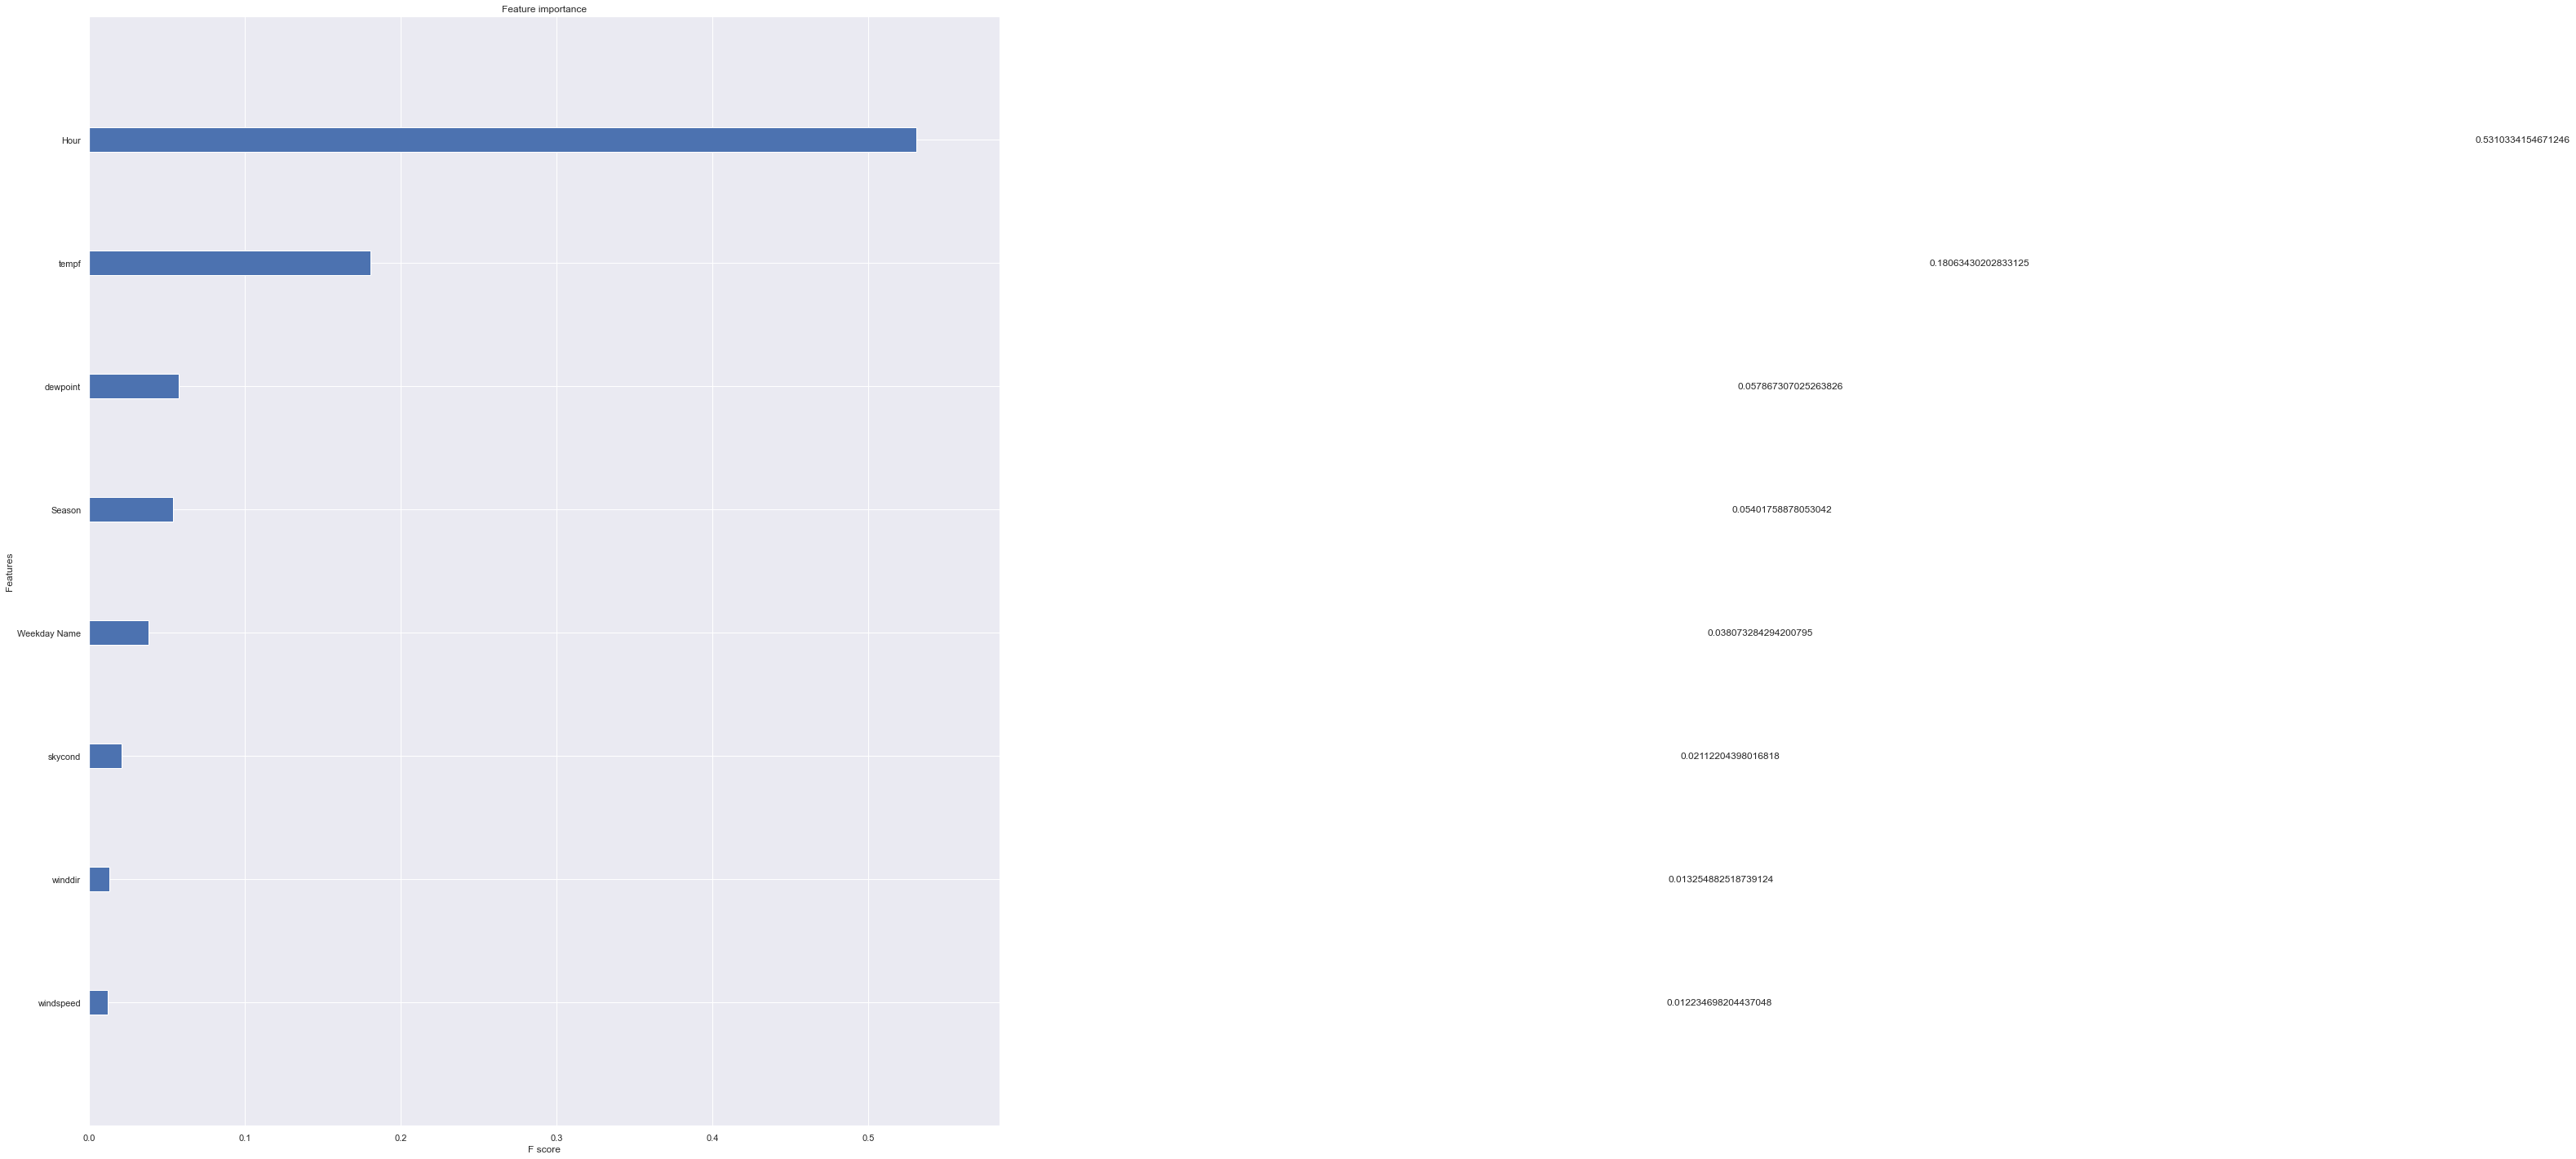

In [222]:
fig, ax = plt.subplots(figsize=(20, 25))
plot_importance(reg, ax=ax,importance_type= "gain")

In [223]:
import shap
shap.initjs()

In [224]:
mybooster = reg.get_booster()

In [225]:
model_bytearray = mybooster.save_raw()[4:]

def myfun(self=None):
    return model_bytearray

mybooster.save_raw = myfun

# Shap explainer initilization
shap_ex = shap.TreeExplainer(mybooster)

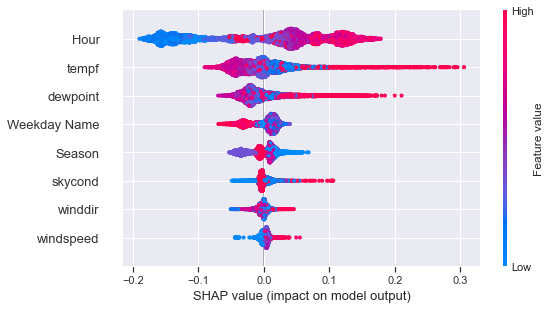

In [226]:
explainer = shap.TreeExplainer(mybooster)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

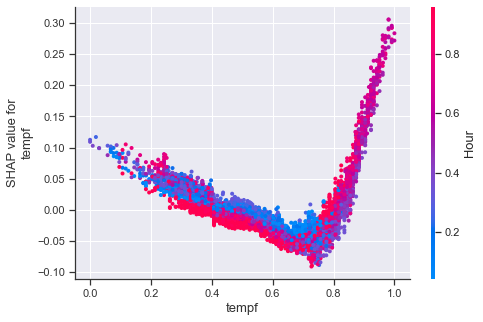

In [227]:
shap.dependence_plot("tempf", shap_values, X_train)

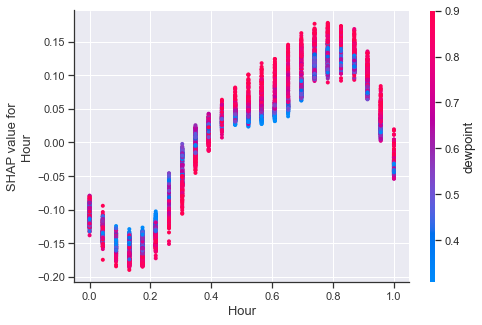

In [228]:
shap.dependence_plot("Hour", shap_values, X_train)

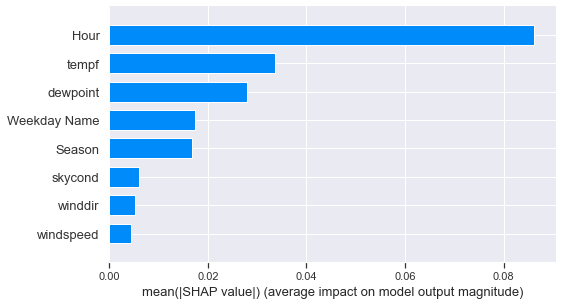

In [229]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [230]:
monthly_norm

2016-01-01    0.309709
2016-02-01    0.290128
2016-03-01    0.213662
2016-04-01    0.194456
2016-05-01    0.234574
2016-06-01    0.345790
2016-07-01    0.471627
2016-08-01    0.483286
2016-09-01    0.308790
2016-10-01    0.195726
2016-11-01    0.233249
2016-12-01    0.296577
2017-01-01    0.277606
2017-02-01    0.242977
2017-03-01    0.249868
2017-04-01    0.170976
2017-05-01    0.193009
2017-06-01    0.334853
2017-07-01    0.411385
2017-08-01    0.350331
2017-09-01    0.276540
2017-10-01    0.216332
2017-11-01    0.260586
2017-12-01    0.339318
Freq: MS, Name: MW, dtype: float64

In [231]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [232]:
# monthly average forecasts
train = monthly_norm[:'2016']
test = monthly_norm['2017':]

In [233]:
best_monthly_seas_order = (0,1,1,12)
# fit SARIMA model
model_m = SARIMAX(train, seasonal_order=best_monthly_seas_order).fit()

In [234]:
forecast_m = model_m.get_forecast(steps=len(test))
forecast_m

In [235]:
# dataframe of montly forecasts
pred_m_norm = pd.Series(forecast_m.predicted_mean, index=test.index)
m_norm_df = pd.DataFrame({'m_norm':pred_m_norm, 'month':pred_m_norm.index.month, 'year':pred_m_norm.index.year})

In [236]:
m_norm_df

,m_norm,month,year
2017-01-01,0.309709,1,2017
2017-02-01,0.290128,2,2017
2017-03-01,0.213662,3,2017
2017-04-01,0.194456,4,2017
2017-05-01,0.234574,5,2017
2017-06-01,0.345790,6,2017
2017-07-01,0.471627,7,2017
2017-08-01,0.483286,8,2017
2017-09-01,0.308790,9,2017
2017-10-01,0.195726,10,2017


In [237]:
# Hourly residuals
GBR_prediction = reg.predict(X_test)

Text(0, 0.5, 'Electricity Demand')

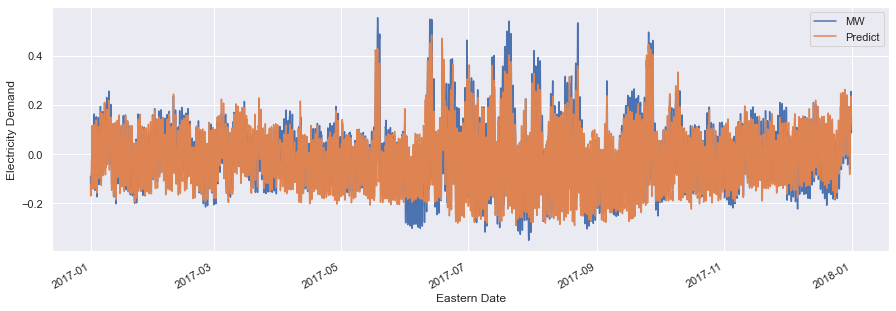

In [238]:
a = y_test.to_frame()
a['Predict'] = pd.DataFrame(data=GBR_prediction.flatten()).values
_ = a[['MW', 'Predict']].plot(figsize=(15, 5))
plt.xlabel('Eastern Date')
plt.ylabel('Electricity Demand')

In [239]:
a['year'] = a.index.year
a['month'] = a.index.month
a

,MW,Predict,year,month
2017-01-01 00:00:00,-0.091922,-0.137132,2017,1
2017-01-01 01:00:00,-0.125466,-0.162766,2017,1
2017-01-01 02:00:00,-0.152738,-0.170930,2017,1
2017-01-01 03:00:00,-0.161850,-0.170171,2017,1
2017-01-01 04:00:00,-0.163105,-0.166347,2017,1
...,...,...,...,...
2017-12-31 19:00:00,0.215159,0.235034,2017,12
2017-12-31 20:00:00,0.186567,0.221539,2017,12
2017-12-31 21:00:00,0.154211,0.210204,2017,12
2017-12-31 22:00:00,0.120864,0.161856,2017,12


In [240]:
pred_gbr_norm_df = a.merge(m_norm_df, on=['month','year'])
pred_gbr_norm_df

,MW,Predict,year,month,m_norm
0,-0.091922,-0.137132,2017,1,0.309709
1,-0.125466,-0.162766,2017,1,0.309709
2,-0.152738,-0.170930,2017,1,0.309709
3,-0.161850,-0.170171,2017,1,0.309709
4,-0.163105,-0.166347,2017,1,0.309709
...,...,...,...,...,...
8755,0.215159,0.235034,2017,12,0.296577
8756,0.186567,0.221539,2017,12,0.296577
8757,0.154211,0.210204,2017,12,0.296577
8758,0.120864,0.161856,2017,12,0.296577


In [241]:
pred_gbr_norm = pd.Series((pred_gbr_norm_df['m_norm'] + pred_gbr_norm_df['Predict']).values, index=a.index)
pred_gbr = pred_gbr_norm * (load_max - load_min) + load_min

In [242]:
pred_gbr

2017-01-01 00:00:00     944.951060
2017-01-01 01:00:00     906.131125
2017-01-01 02:00:00     893.768122
2017-01-01 03:00:00     894.916387
2017-01-01 04:00:00     900.708439
                          ...     
2017-12-31 19:00:00    1488.671041
2017-12-31 20:00:00    1468.234261
2017-12-31 21:00:00    1451.069281
2017-12-31 22:00:00    1377.850920
2017-12-31 23:00:00    1323.439013
Length: 8760, dtype: float64

In [243]:
test2017 = Electric_Demand.loc['2017'].copy()

In [244]:
test2017['Predict'] = pred_gbr

In [245]:
test2017

,MW,Year,Month,Day,Hour,Weekday Name,Season,Predict
Eastern Date Hour,,,,,,,,
2017-01-01 00:00:00,964.8,2017,1,1,0,6,4.0,944.951060
2017-01-01 01:00:00,914.0,2017,1,1,1,6,4.0,906.131125
2017-01-01 02:00:00,872.7,2017,1,1,2,6,4.0,893.768122
2017-01-01 03:00:00,858.9,2017,1,1,3,6,4.0,894.916387
2017-01-01 04:00:00,857.0,2017,1,1,4,6,4.0,900.708439
...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,1523.3,2017,12,31,19,6,4.0,1488.671041
2017-12-31 20:00:00,1480.0,2017,12,31,20,6,4.0,1468.234261
2017-12-31 21:00:00,1431.0,2017,12,31,21,6,4.0,1451.069281


In [246]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test2017['MW'], test2017['Predict']))
print('RMSE: ', rms)

RMSE:  96.00337739542319


In [247]:
import numpy as np
def compute_mape(y, yhat):
    pct_err = ((yhat - y) / y).dropna()
    return np.mean(np.abs(pct_err)) 

print("grad boost reg MAPE:", compute_mape(test2017['MW'], pred_gbr))

grad boost reg MAPE: 0.06852353717360384


Text(0, 0.5, 'Electricity Demand')

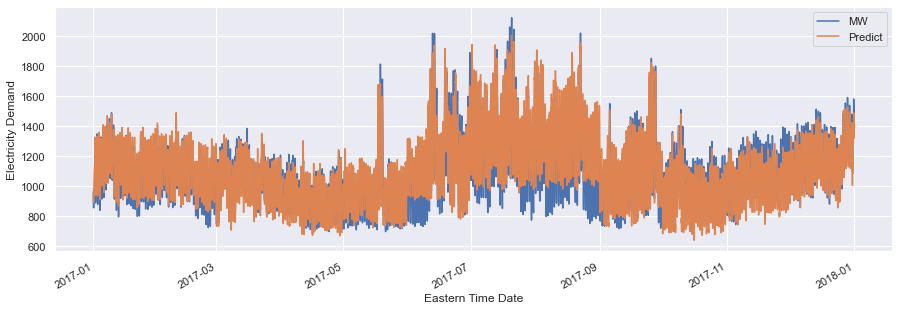

In [248]:
_ = test2017[['MW', 'Predict']].plot(figsize=(15, 5))
plt.xlabel('Eastern Time Date')
plt.ylabel('Electricity Demand')

In [249]:
#Increase 10 Degrees and see what happens in 2017

In [250]:
result

,MW,Hour,Weekday Name,Season,tempf,dewpoint,winddir,windspeed,skycond
2016-01-01 00:00:00,893.7,0,4,4.0,41.000000,26.959999,280.0,26.0,1219.0
2016-01-01 01:00:00,862.3,1,4,4.0,39.919998,26.959999,280.0,31.0,50609.0
2016-01-01 02:00:00,794.3,2,4,4.0,39.020000,28.040001,280.0,21.0,1189.0
2016-01-01 03:00:00,804.0,3,4,4.0,39.919998,26.959999,250.0,26.0,1128.0
2016-01-01 04:00:00,812.0,4,4,4.0,39.919998,26.959999,250.0,41.0,1219.0
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,1523.3,19,6,4.0,8.060000,-9.040000,310.0,31.0,22000.0
2017-12-31 20:00:00,1480.0,20,6,4.0,6.980000,-9.040000,290.0,36.0,22000.0
2017-12-31 21:00:00,1431.0,21,6,4.0,NaN,NaN,NaN,NaN,NaN
2017-12-31 22:00:00,1380.5,22,6,4.0,NaN,NaN,NaN,NaN,NaN


In [251]:
hotter= result.copy()
hotter['tempf']= hotter['tempf']+15
hotter

,MW,Hour,Weekday Name,Season,tempf,dewpoint,winddir,windspeed,skycond
2016-01-01 00:00:00,893.7,0,4,4.0,56.000000,26.959999,280.0,26.0,1219.0
2016-01-01 01:00:00,862.3,1,4,4.0,54.919998,26.959999,280.0,31.0,50609.0
2016-01-01 02:00:00,794.3,2,4,4.0,54.020000,28.040001,280.0,21.0,1189.0
2016-01-01 03:00:00,804.0,3,4,4.0,54.919998,26.959999,250.0,26.0,1128.0
2016-01-01 04:00:00,812.0,4,4,4.0,54.919998,26.959999,250.0,41.0,1219.0
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,1523.3,19,6,4.0,23.060000,-9.040000,310.0,31.0,22000.0
2017-12-31 20:00:00,1480.0,20,6,4.0,21.980000,-9.040000,290.0,36.0,22000.0
2017-12-31 21:00:00,1431.0,21,6,4.0,NaN,NaN,NaN,NaN,NaN
2017-12-31 22:00:00,1380.5,22,6,4.0,NaN,NaN,NaN,NaN,NaN


In [252]:
hotter_norm= hotter.copy()

hotter_norm['MW'] = (hotter_norm['MW'] - load_min) / (load_max - load_min)
hotter_norm['Hour'] = (hotter_norm['Hour'] - hour_min) / (hour_max - hour_min)
hotter_norm['Season'] = (hotter_norm['Season'] - ssn_min) / (ssn_max - ssn_min)
hotter_norm['tempf'] = (hotter_norm['tempf'] - temp_min) / (temp_max - temp_min)
hotter_norm['dewpoint'] = (hotter_norm['dewpoint'] - dew_min) / (dew_max - dew_min)
hotter_norm['winddir'] = (hotter_norm['winddir'] - winddir_min) / (winddir_max - winddir_min)
hotter_norm['windspeed'] = (hotter_norm['windspeed'] - windspeed_min) / (windspeed_max - windspeed_min)
hotter_norm['skycond'] = (hotter_norm['skycond'] - skycond_min) / (skycond_max - skycond_min)
hotter_norm['Weekday Name'] = (hotter_norm['Weekday Name'] - weekday_min) / (weekday_max - weekday_min)

hotter_norm

,MW,Hour,Weekday Name,Season,tempf,dewpoint,winddir,windspeed,skycond
2016-01-01 00:00:00,0.138735,0.000000,0.666667,1.0,0.601981,0.494662,0.777778,0.187050,0.011894
2016-01-01 01:00:00,0.118001,0.043478,0.666667,1.0,0.591492,0.494662,0.777778,0.223022,0.505947
2016-01-01 02:00:00,0.073098,0.086957,0.666667,1.0,0.582751,0.505338,0.777778,0.151079,0.011594
2016-01-01 03:00:00,0.079503,0.130435,0.666667,1.0,0.591492,0.494662,0.694444,0.187050,0.010983
2016-01-01 04:00:00,0.084786,0.173913,0.666667,1.0,0.591492,0.494662,0.694444,0.294964,0.011894
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,0.554477,0.826087,1.000000,1.0,0.282051,0.138790,0.861111,0.223022,0.219768
2017-12-31 20:00:00,0.525885,0.869565,1.000000,1.0,0.271562,0.138790,0.805556,0.258993,0.219768
2017-12-31 21:00:00,0.493529,0.913043,1.000000,1.0,NaN,NaN,NaN,NaN,NaN
2017-12-31 22:00:00,0.460182,0.956522,1.000000,1.0,NaN,NaN,NaN,NaN,NaN


In [253]:
X_hotter= hotter_norm.copy()
y_hotter= X_hotter.pop('MW')

In [254]:
X_train_hotter, X_test_hotter, y_train_hotter, y_test_hotter = timeseries_train_test_split(X_hotter, y_hotter, test_size=0.4993)

In [255]:
X_test_hotter

,Hour,Weekday Name,Season,tempf,dewpoint,winddir,windspeed,skycond
2017-01-01 00:00:00,0.000000,1.0,1.0,0.601981,0.444840,0.583333,0.258993,0.019516
2017-01-01 01:00:00,0.043478,1.0,1.0,0.591492,0.455516,0.555556,0.107914,0.509758
2017-01-01 02:00:00,0.086957,1.0,1.0,0.591492,0.455516,0.555556,0.107914,0.021047
2017-01-01 03:00:00,0.130435,1.0,1.0,0.591492,0.466192,0.555556,0.151079,0.027138
2017-01-01 04:00:00,0.173913,1.0,1.0,0.601981,0.466192,0.555556,0.258993,0.017996
...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,0.826087,1.0,1.0,0.282051,0.138790,0.861111,0.223022,0.219768
2017-12-31 20:00:00,0.869565,1.0,1.0,0.271562,0.138790,0.805556,0.258993,0.219768
2017-12-31 21:00:00,0.913043,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2017-12-31 22:00:00,0.956522,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [256]:
# Hourly residuals
GBR_prediction_hotter = reg.predict(X_test_hotter)

In [257]:
a['Predict_hotter'] = pd.DataFrame(data=GBR_prediction_hotter.flatten()).values

In [258]:
a

,MW,Predict,year,month,Predict_hotter
2017-01-01 00:00:00,-0.091922,-0.137132,2017,1,-0.144194
2017-01-01 01:00:00,-0.125466,-0.162766,2017,1,-0.164312
2017-01-01 02:00:00,-0.152738,-0.170930,2017,1,-0.164650
2017-01-01 03:00:00,-0.161850,-0.170171,2017,1,-0.169483
2017-01-01 04:00:00,-0.163105,-0.166347,2017,1,-0.166061
...,...,...,...,...,...
2017-12-31 19:00:00,0.215159,0.235034,2017,12,0.212607
2017-12-31 20:00:00,0.186567,0.221539,2017,12,0.196862
2017-12-31 21:00:00,0.154211,0.210204,2017,12,0.210204
2017-12-31 22:00:00,0.120864,0.161856,2017,12,0.161856


In [259]:
pred_gbr_norm_df_hotter = a.merge(m_norm_df, on=['month','year'])
pred_gbr_norm_df_hotter

,MW,Predict,year,month,Predict_hotter,m_norm
0,-0.091922,-0.137132,2017,1,-0.144194,0.309709
1,-0.125466,-0.162766,2017,1,-0.164312,0.309709
2,-0.152738,-0.170930,2017,1,-0.164650,0.309709
3,-0.161850,-0.170171,2017,1,-0.169483,0.309709
4,-0.163105,-0.166347,2017,1,-0.166061,0.309709
...,...,...,...,...,...,...
8755,0.215159,0.235034,2017,12,0.212607,0.296577
8756,0.186567,0.221539,2017,12,0.196862,0.296577
8757,0.154211,0.210204,2017,12,0.210204,0.296577
8758,0.120864,0.161856,2017,12,0.161856,0.296577


In [260]:
pred_gbr_norm_hotter = pd.Series((pred_gbr_norm_df_hotter['m_norm'] + pred_gbr_norm_df_hotter['Predict_hotter']).values, index=a.index)

In [261]:
pred_gbr_hotter = pred_gbr_norm_hotter * (load_max - load_min) + load_min

In [262]:
fin = Electric_Demand.loc['2017'].copy()

In [263]:
fin['Predict'] = pred_gbr_hotter

In [264]:
fin

,MW,Year,Month,Day,Hour,Weekday Name,Season,Predict
Eastern Date Hour,,,,,,,,
2017-01-01 00:00:00,964.8,2017,1,1,0,6,4.0,934.256340
2017-01-01 01:00:00,914.0,2017,1,1,1,6,4.0,903.789824
2017-01-01 02:00:00,872.7,2017,1,1,2,6,4.0,903.277208
2017-01-01 03:00:00,858.9,2017,1,1,3,6,4.0,895.959583
2017-01-01 04:00:00,857.0,2017,1,1,4,6,4.0,901.141622
...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,1523.3,2017,12,31,19,6,4.0,1454.708867
2017-12-31 20:00:00,1480.0,2017,12,31,20,6,4.0,1430.863851
2017-12-31 21:00:00,1431.0,2017,12,31,21,6,4.0,1451.069281


In [265]:
fin.nlargest(20, ['Predict']) 

,MW,Year,Month,Day,Hour,Weekday Name,Season,Predict
Eastern Date Hour,,,,,,,,
2017-07-01 16:00:00,1691.4,2017,7,1,16,5,2.0,2242.517765
2017-08-18 18:00:00,1609.2,2017,8,18,18,4,2.0,2235.855901
2017-07-20 18:00:00,1974.0,2017,7,20,18,3,2.0,2235.244099
2017-08-18 15:00:00,1638.9,2017,8,18,15,4,2.0,2228.481589
2017-08-03 15:00:00,1771.4,2017,8,3,15,3,2.0,2207.231158
2017-08-01 18:00:00,1824.6,2017,8,1,18,1,2.0,2202.987517
2017-07-12 16:00:00,1904.1,2017,7,12,16,2,2.0,2198.282365
2017-07-18 20:00:00,1799.2,2017,7,18,20,1,2.0,2189.108434
2017-08-04 14:00:00,1751.8,2017,8,4,14,4,2.0,2186.578012


In [266]:
test2017.nlargest(20, ['Predict']) 

,MW,Year,Month,Day,Hour,Weekday Name,Season,Predict
Eastern Date Hour,,,,,,,,
2017-07-20 15:00:00,2109.7,2017,7,20,15,3,2.0,2007.877382
2017-07-20 16:00:00,2125.1,2017,7,20,16,3,2.0,1977.701430
2017-07-21 17:00:00,2048.2,2017,7,21,17,4,2.0,1965.844816
2017-07-21 16:00:00,2044.7,2017,7,21,16,4,2.0,1965.100082
2017-08-22 14:00:00,1965.2,2017,8,22,14,1,2.0,1958.212826
2017-07-01 16:00:00,1691.4,2017,7,1,16,5,2.0,1946.465223
2017-08-22 15:00:00,1997.8,2017,8,22,15,1,2.0,1943.846927
2017-07-12 16:00:00,1904.1,2017,7,12,16,2,2.0,1943.813364
2017-06-13 14:00:00,1988.7,2017,6,13,14,1,1.0,1941.047299
